In [17]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [18]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [19]:
print(train_images.shape[1:])

(28, 28)


In [20]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [21]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [22]:
#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

tahn: Performed really well with 1 hidden layer but the train and test data were not very close like they were with relu. Performed extremely bad with more hidden layers.<br/>
relu: The more hidden layers I add the closer my training data accuracy and loss get to the test accuracy and loss.<br/>
sigmoid: With only 2 hidden layers sigmoid out performed the other two. It did signifigantly worse with more hidden layers.


In [24]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0094 - accuracy: 0.9976 - val_loss: 0.0593 - val_accuracy: 0.9816
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.0583 - val_accuracy: 0.9833
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0664 - val_accuracy: 0.9820
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0678 - val_accuracy: 0.9810
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0636 - val_accuracy: 0.9827
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0761 - val_accuracy: 0.9806
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0714 - val_accuracy: 0.9814

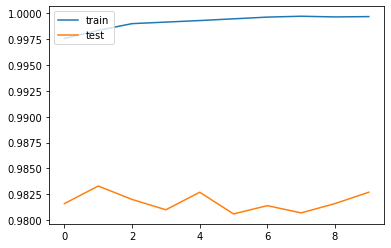

In [25]:
##ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

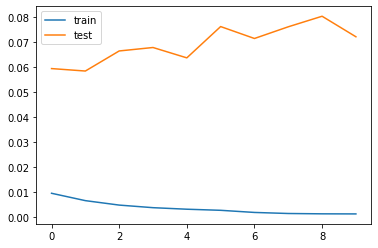

In [26]:
## LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model.predict_classes(test_data[503].reshape(1,784))

array([2])

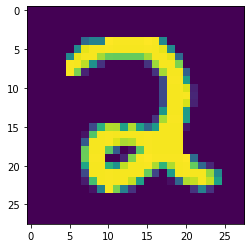

In [28]:
plt.imshow(test_data[503].reshape(28,28))

In [29]:
model.predict_classes(test_data[523].reshape(1,784))

array([1])

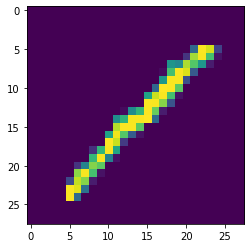

In [30]:
plt.imshow(test_data[523].reshape(28,28))

In [31]:
model.predict_classes(test_data[101].reshape(1,784))

array([0])

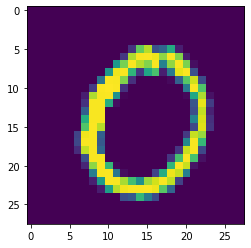

In [32]:
plt.imshow(test_data[101].reshape(28,28))